In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
gdp_file = "../data/gdp_data.csv"
pop_file = "../data/population_data.csv"

gdp_df = pd.read_csv(gdp_file)  # GDP 데이터 로드
population_df = pd.read_csv(pop_file)  # 인구 데이터 로드

In [3]:
# 데이터 확인
print(gdp_df.head())  # GDP 데이터의 상위 5개 행 출력
print(population_df.head())  # 인구 데이터의 상위 5개 행 출력

  Country  Year             GDP
0     USA  2000  10252345464000
1     USA  2001  10581821399000
2     USA  2002  10936419054000
3     USA  2003  11458243831000
4     USA  2004  12213729147000
  Country  Year  Population
0     USA  2000   282162411
1     USA  2001   284968955
2     USA  2002   287625193
3     USA  2003   290107933
4     USA  2004   292805298


In [5]:
print(gdp_df.info())  # GDP 데이터의 구조 확인
print(population_df.info())  # 인구 데이터의 구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  210 non-null    object
 1   Year     210 non-null    int64 
 2   GDP      210 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     210 non-null    object
 1   Year        210 non-null    int64 
 2   Population  210 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.1+ KB
None


In [7]:
# 2. 데이터 병합 (국가와 연도를 기준으로 GDP와 인구 데이터를 하나로 합침)
# 병합을 통해 동일한 국가 및 연도 데이터를 연결
merged_df = pd.merge(gdp_df, population_df, on=["Country", "Year"])  # 두 개의 데이터프레임을 특정 열을 기준으로 병합


In [8]:
# 3. 1인당 GDP(GDP per Capita) 계산
# 1인당 GDP = 총 GDP / 총 인구
merged_df["GDP_per_Capita"] = merged_df["GDP"] / merged_df["Population"]  # GDP와 인구수를 사용하여 1인당 GDP 계산


In [9]:
# 병합된 데이터 확인 (상위 5개 행 출력)
print("\n병합된 데이터 샘플:")
print(merged_df.head())


병합된 데이터 샘플:
  Country  Year             GDP  Population  GDP_per_Capita
0     USA  2000  10252345464000   282162411    36334.908777
1     USA  2001  10581821399000   284968955    37133.242809
2     USA  2002  10936419054000   287625193    38023.161114
3     USA  2003  11458243831000   290107933    39496.485713
4     USA  2004  12213729147000   292805298    41712.801068


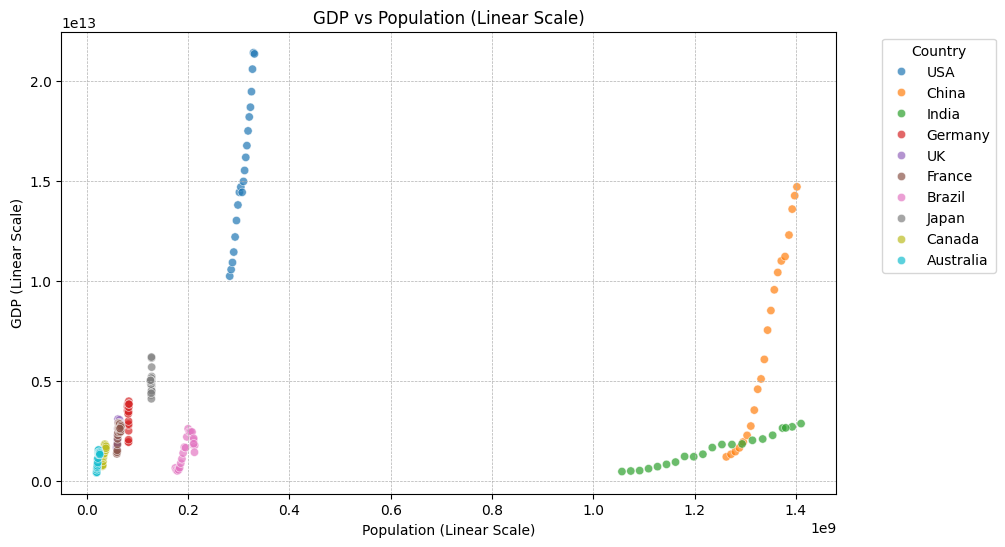

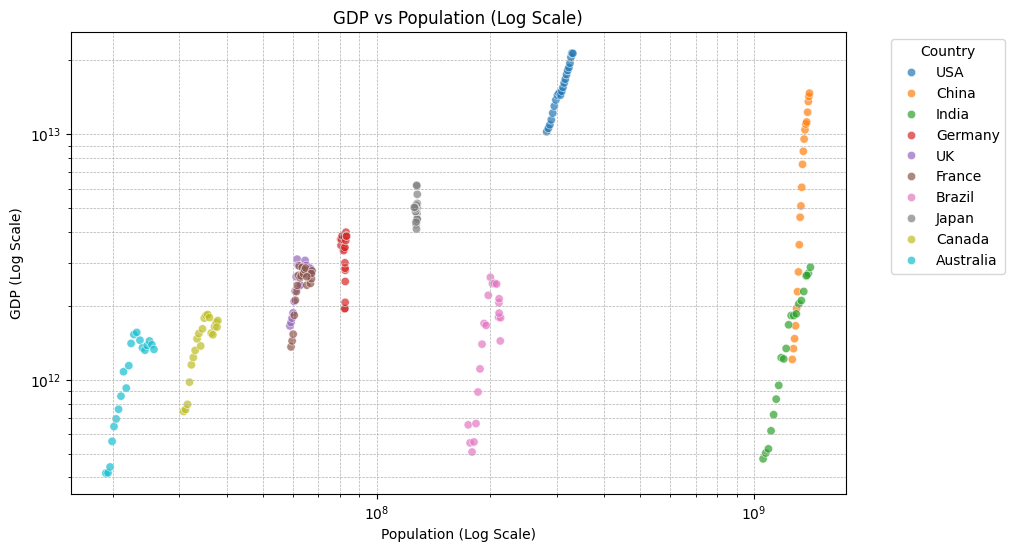

In [27]:
# 4. GDP vs 인구 관계 (산점도)
# 국가별 GDP와 인구 관계를 시각적으로 분석

# 선형 스케일 그래프
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="Population", y="GDP", hue="Country", alpha=0.7) # 산점도 생성
plt.xlabel("Population (Linear Scale)")
plt.ylabel("GDP (Linear Scale)")
plt.title("GDP vs Population (Linear Scale)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# log 스케일 그래프
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.scatterplot(data=merged_df, x="Population", y="GDP", hue="Country", alpha=0.7)  # 산점도 생성
plt.xscale("log")  # X축을 로그 스케일로 설정하여 값의 차이를 균형 있게 표현
plt.yscale("log")  # Y축을 로그 스케일로 설정하여 값의 차이를 균형 있게 표현
plt.xlabel("Population (Log Scale)")
plt.ylabel("GDP (Log Scale)")
plt.title("GDP vs Population (Log Scale)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 격자 추가
plt.show()  # 그래프 출력


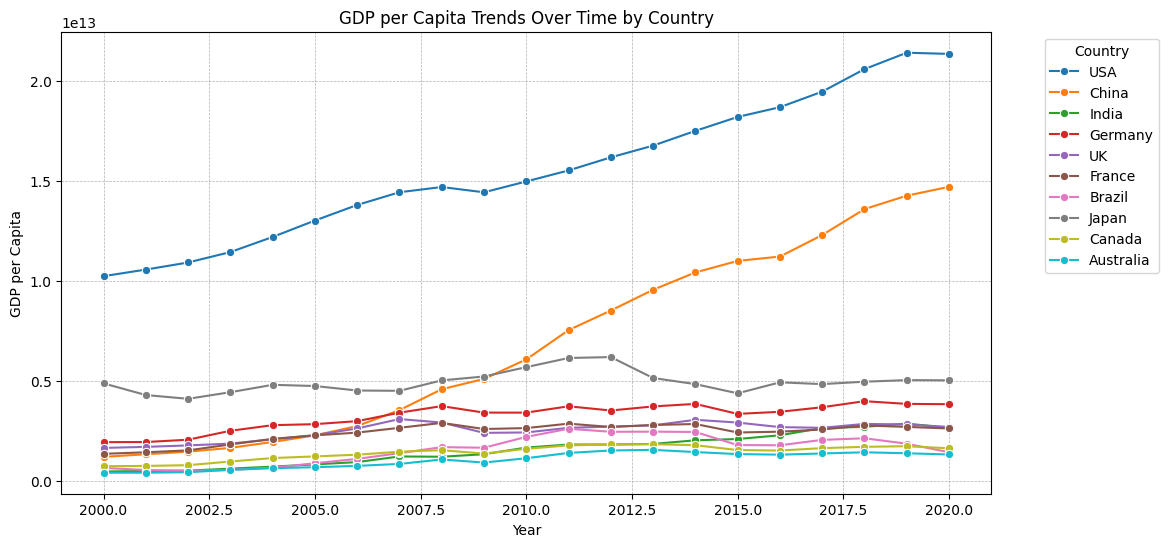

In [21]:
# 5. 연도별 1인당 GDP 변화 (국가별 선 그래프)
# 각 국가별 연도별 1인당 GDP 변화를 선 그래프로 표현
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.lineplot(data=merged_df, x="Year", y="GDP", hue="Country", marker="o")  # 선 그래프 생성
plt.xlabel("Year")  # X축: 연도
plt.ylabel("GDP per Capita")  # Y축: 1인당 GDP
plt.title("GDP per Capita Trends Over Time by Country")  # 그래프 제목 설정
plt.grid(True, linestyle="--", linewidth=0.5)  # 격자 추가
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정
plt.show()  # 그래프 출력

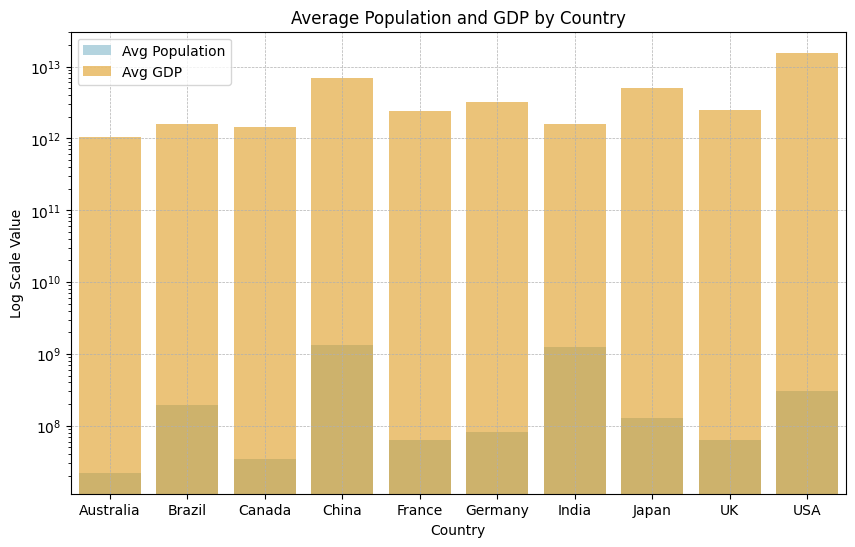

In [25]:
# 6. 국가별 총 GDP 대비 인구수 비율 (막대 그래프)
# 국가별 평균 인구수 및 GDP 계산하여 비교 분석
country_stats = merged_df.groupby("Country").agg({"Population": "mean", "GDP": "mean"}).reset_index()  # 특정 열을 기준으로 평균 계산

# 국가별 평균 GDP와 인구를 비교하는 막대 그래프
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(data=country_stats, x="Country", y="Population", color="lightblue", label="Avg Population")  # 인구수 막대그래프
sns.barplot(data=country_stats, x="Country", y="GDP", color="orange", alpha=0.6, label="Avg GDP")  # GDP 막대그래프

# 그래프 제목 및 범례 설정
plt.yscale("log")  # 데이터 차이가 커서 로그 스케일 적용하여 시각적 균형 유지
plt.xlabel("Country")  # X축: 국가명
plt.ylabel("Log Scale Value")  # Y축: 값 (로그 스케일)
plt.title("Average Population and GDP by Country")  # 그래프 제목
plt.legend()  # 범례 추가
plt.grid(True, linestyle="--", linewidth=0.5)  # 격자 추가
plt.show()  # 그래프 출력
